# Ridge and Lasso Regression - Lab

## Introduction

In this lab, you'll practice your knowledge of Ridge and Lasso regression!

## Objectives

In this lab you will: 

- Use Lasso and Ridge regression with scikit-learn 
- Compare and contrast Lasso, Ridge and non-regularized regression 

## Housing Prices Data

Let's look at yet another house pricing dataset: 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Housing_Prices/train.csv')

Look at `.info()` of the data: 

In [2]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- First, split the data into `X` (predictor) and `y` (target) variables 
- Split the data into 75-25 training-test sets. Set the `random_state` to 10 
- Remove all columns of `object` type from `X_train` and `X_test` and assign them to `X_train_cont` and `X_test_cont`, respectively 

In [7]:
# Create X and y
y = df['SalePrice'] # Assuming we are predicting saleprice
X = df.drop('SalePrice', axis=1)

In [21]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=10)

len(X_train), len(X_test)

(1095, 365)

In [22]:
# Remove "object"-type features from X
cont_features = X[X.columns[X.dtypes != 'object']]

# Remove "object"-type features from X_train and X_test
X_train_cont = X_train[X_train.columns[X_train.dtypes != 'object']]
X_test_cont = X_test[X_test.columns[X_test.dtypes != 'object']]

X_train_cont.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
567,568,20,70.0,10171,7,5,2004,2004,168.0,2,...,532,0,0,0,0,0,0,0,3,2010
1416,1417,190,60.0,11340,4,6,1885,1950,0.0,0,...,560,0,0,114,0,0,0,0,4,2010


## Let's use this data to build a first naive linear regression model

- Fill the missing values in data using median of the columns (use [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)) 
- Fit a linear regression model to this data 
- Compute the R-squared and the MSE for both the training and test sets 


In [100]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Impute missing values with median using SimpleImputer
impute = SimpleImputer(strategy='median')
impute.fit(X_train_cont)
X_train_imputed = impute.transform(X_train_cont)
X_test_imputed = impute.transform(X_test_cont)

# Fit the model and print R2 and MSE for training and test sets
linreg = LinearRegression()
model = linreg.fit(X_train_imputed, y_train)

# Print R2 and MSE for training and test sets
print('Train R2:',model.score(X_train_imputed, y_train))
print('Test R2:',model.score(X_test_imputed, y_test))
print('MSE Train:', mean_squared_error(y_train, model.predict(X_train_imputed)))
print('MSE Test:', mean_squared_error(y_test, model.predict(X_test_imputed)))

Train R2: 0.8069714678400264
Test R2: 0.8203264293698962
MSE Train: 1212415985.7084074
MSE Test: 1146350639.8805504


## Normalize your data

- Normalize your data using a `StandardScalar`  
- Fit a linear regression model to this data 
- Compute the R-squared and the MSE for both the training and test sets 


In [101]:
from sklearn.preprocessing import StandardScaler

# Scale the train and test data
ss = StandardScaler().fit(X_train_imputed)
X_train_imputed_scaled = pd.DataFrame(ss.transform(X_train_imputed),
                                     columns = X_train_cont.columns)
X_test_imputed_scaled = pd.DataFrame(ss.transform(X_test_imputed),
                                     columns = X_test_cont.columns)

X_train_imputed_scaled.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.375465,-0.868555,-0.020790,-0.045149,0.639596,-0.525371,1.075842,0.927822,0.344734,-0.954564,...,0.255948,-0.767076,-0.710015,-0.353939,-0.119925,-0.26839,-0.073427,-0.091508,-1.221204,1.636312
1,1.646800,3.097630,-0.455243,0.061269,-1.551303,0.386327,-2.868883,-1.700933,-0.570404,-0.958883,...,0.387519,-0.767076,-0.710015,1.494842,-0.119925,-0.26839,-0.073427,-0.091508,-0.854139,1.636312
2,1.541995,0.064665,0.196436,-0.083475,0.639596,0.386327,0.876949,0.635738,-0.570404,1.146352,...,0.495594,1.261706,1.827116,-0.353939,-0.119925,-0.26839,-0.073427,-0.091508,-0.120009,-1.376318
3,-1.316331,2.397715,-1.150367,-0.488028,0.639596,1.298025,0.512310,0.100251,-0.570404,0.109929,...,0.124378,2.769260,-0.187665,-0.353939,-0.119925,-0.26839,-0.073427,-0.091508,-0.120009,-1.376318
4,0.203346,-0.868555,0.326772,-0.047972,-0.090704,0.386327,0.081374,0.684419,-0.031126,0.472677,...,0.030399,1.357933,-0.710015,-0.353939,-0.119925,-0.26839,14.774354,-0.091508,-1.955334,-1.376318


In [104]:
# Fit the model
linreg_norm = LinearRegression()
linreg_norm.fit(X_train_imputed_scaled, y_train)

# Print R2 and MSE for training and test sets
print('Train R2:',linreg_norm.score(X_train_imputed_scaled, y_train))
print('Test R2:',linreg_norm.score(X_test_imputed_scaled, y_test))
print('MSE Train:', mean_squared_error(y_train, linreg_norm.predict(X_train_imputed_scaled)))
print('MSE Test:', mean_squared_error(y_test, linreg_norm.predict(X_test_imputed_scaled)))

Train R2: 0.8069872838991697
Test R2: 0.8203718960075601
MSE Train: 1212316644.7316003
MSE Test: 1146060554.3159537


## Include categorical variables

The above models didn't include categorical variables so far, let's include them! 


- Include all columns of `object` type from `X_train` and `X_test` and assign them to `X_train_cat` and `X_test_cat`, respectively 
- Fill missing values in all these columns with the string `'missing'` 

In [82]:
X_train.columns[X_train.dtypes == 'object']

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [83]:
# Create X_cat which contains only the categorical variables
features_cat = X_train.columns[X_train.dtypes == 'object']
X_train_cat = X_train[features_cat]
X_test_cat = X_test[features_cat]

# Fill missing values with the string 'missing'
X_train_cat = X_train_cat.fillna('missing')
X_test_cat = X_test_cat.fillna('missing')

X_train_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
567,RL,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,Attchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal
1416,RM,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,Detchd,Unf,TA,TA,N,missing,missing,missing,WD,Normal
1372,RL,Pave,missing,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,...,Detchd,RFn,TA,TA,Y,missing,missing,missing,WD,Normal
172,RL,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,Gd,TA,Y,missing,missing,missing,WD,Normal
810,RL,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,RFn,TA,TA,Y,Fa,GdPrv,missing,WD,Normal


- One-hot encode all these categorical columns using `OneHotEncoder` 
- Transform the training and test DataFrames (`X_train_cat`) and (`X_test_cat`) 
- Run the given code to convert these transformed features into DataFrames 

In [84]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncode categorical variables
ohe = OneHotEncoder(handle_unknown='ignore').fit(X_train_cat) # should we be dropping first here?

In [85]:
# Transform training and test sets
X_train_ohe = ohe.transform(X_train_cat)
X_test_ohe = ohe.transform(X_test_cat)

# Convert these columns into a DataFrame
columns = ohe.get_feature_names(input_features=X_train_cat.columns)
cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns)
cat_test_df = pd.DataFrame(X_test_ohe.todense(), columns=columns)

cat_train_df.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_missing,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


- Combine `X_train_imputed_scaled` and `cat_train_df` into a single DataFrame  
- Similarly, combine `X_test_imputed_scaled` and `cat_test_df` into a single DataFrame 

In [109]:
# Your code here
X_train_all = X_train_imputed_scaled.combine_first(cat_train_df)
X_test_all = X_test_imputed_scaled.combine_first(cat_test_df)


X_train_all_sol = pd.concat([pd.DataFrame(X_train_imputed_scaled), cat_train_df], axis=1)
X_test_all_sol = pd.concat([pd.DataFrame(X_test_imputed_scaled), cat_test_df], axis=1)

X_train_all_sol.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.375465,-0.868555,-0.020790,-0.045149,0.639596,-0.525371,1.075842,0.927822,0.344734,-0.954564,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.646800,3.097630,-0.455243,0.061269,-1.551303,0.386327,-2.868883,-1.700933,-0.570404,-0.958883,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.541995,0.064665,0.196436,-0.083475,0.639596,0.386327,0.876949,0.635738,-0.570404,1.146352,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.316331,2.397715,-1.150367,-0.488028,0.639596,1.298025,0.512310,0.100251,-0.570404,0.109929,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.203346,-0.868555,0.326772,-0.047972,-0.090704,0.386327,0.081374,0.684419,-0.031126,0.472677,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [110]:
X_train_all.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley_Grvl,Alley_Pave,Alley_missing,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,...,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,0.946631,-0.792377,-0.119925,0.0,0.0,1.0,0.147866,1.0,0.0,0.0,...,0.0,1.0,0.295044,1.042315,1.0,0.0,-0.767076,1.075842,0.927822,1.636312
1,0.204120,1.595992,-0.119925,0.0,0.0,1.0,1.365257,0.0,1.0,0.0,...,0.0,1.0,2.789819,-0.655336,1.0,0.0,-0.767076,-2.868883,-1.700933,1.636312
2,-0.150436,1.470168,-0.119925,0.0,0.0,1.0,0.147866,1.0,0.0,0.0,...,0.0,1.0,0.918738,0.104019,1.0,0.0,1.261706,0.876949,0.635738,-1.376318
3,-0.263482,0.815883,-0.119925,0.0,0.0,1.0,-1.069526,0.0,0.0,0.0,...,0.0,1.0,-0.952343,0.003078,1.0,0.0,2.769260,0.512310,0.100251,-1.376318
4,0.365982,-0.792377,-0.119925,0.0,0.0,1.0,0.147866,1.0,0.0,0.0,...,0.0,1.0,-0.952343,-0.051981,1.0,0.0,1.357933,0.081374,0.684419,-1.376318


In [116]:
# check that combined data has the same columns
(X_train_all != X_train_all_sol[X_train_all.columns]).sum().sum()

0

In [125]:
# check that combined data has the same number of values
X_train_all.shape, X_train_all_sol.shape

((1095, 296), (1095, 296))

In [133]:
#Do the dataframes have the same set of columns
set(X_train_all.columns) == set(X_train_all_sol.columns)

True

Now build a linear regression model using all the features (`X_train_all`). Also, print the R-squared and the MSE for both the training and test sets. 

In [130]:
# Order of columns in my df

# unnecessary but helps to keep code consistent with next block
columns = X_train_all.columns

model = LinearRegression().fit(X_train_all[columns], y_train)

# Print R2 and MSE for training and test sets
print('R2 Train:',model.score(X_train_all[columns], y_train))
print('MSE Train:', mean_squared_error(y_train, model.predict(X_train_all[columns])))

print('R2 Test:',model.score(X_test_all[columns], y_test))
print('MSE Test:', mean_squared_error(y_test, model.predict(X_test_all[columns])))

Do the dataframes have the same set of columns: True
R2 Train: 0.9359999135411868
MSE Train: 401985794.7480952
R2 Test: 0.8563555023601839
MSE Test: 916478484.8837078


In [122]:
# Order of columns as in the solution

columns = X_train_all_sol.columns

model = LinearRegression().fit(X_train_all[columns], y_train)

# Print R2 and MSE for training and test sets
print('R2 Train:',model.score(X_train_all[columns], y_train))
print('MSE Train:', mean_squared_error(y_train, model.predict(X_train_all[columns])))

print('R2 Test:',model.score(X_test_all[columns], y_test))
print('MSE Test:', mean_squared_error(y_test, model.predict(X_test_all[columns])))

R2 Train: 0.9359980904525586
MSE Train: 401997245.60342467
R2 Test: -1.0816535504483235e+20
MSE Test: 6.901149876061705e+29


In [191]:
import random

col_coef = {col: [] for col in X_train_all.columns}
models = []
for i in range(10):
    print('Random Order #', i)
    
    # randomize column order
    columns = list(X_train_all.columns)
    random.shuffle(columns)
    #print(columns[0:10])
    models.append(LinearRegression().fit(X_train_all[columns], y_train))
    
    # Store the coefficients
    for j, col in enumerate(columns):
        col_coef[col].append(models[i].coef_[j])
        
    # Print R2 and MSE for training and test sets
    print('R2 Train:', models[i].score(X_train_all[columns], y_train))
    print('MSE Train:', mean_squared_error(y_train, models[i].predict(X_train_all[columns])))

    print('R2 Test:', models[i].score(X_test_all[columns], y_test))
    print('MSE Test:', mean_squared_error(y_test, models[i].predict(X_test_all[columns])))
    
    print('------------------------------------------------------------------')

display(col_coef)

Random Order # 0
R2 Train: 0.9359999135411868
MSE Train: 401985794.7480953
R2 Test: 0.8563555023601841
MSE Test: 916478484.8837061
------------------------------------------------------------------
Random Order # 1
R2 Train: 0.9359961728893076
MSE Train: 402009289.85570776
R2 Test: -1.3084385100828865e+20
MSE Test: 8.348079898549986e+29
------------------------------------------------------------------
Random Order # 2
R2 Train: 0.9359812394186916
MSE Train: 402103087.27671236
R2 Test: -2.4608570708047675e+20
MSE Test: 1.5700723639423074e+30
------------------------------------------------------------------
Random Order # 3
R2 Train: 0.9359972261482037
MSE Train: 402002674.31598175
R2 Test: -1.0129271270752402e+20
MSE Test: 6.462662573036873e+29
------------------------------------------------------------------
Random Order # 4
R2 Train: 0.9358237744558275
MSE Train: 403092127.78812784
R2 Test: -1.9454773469416427e+21
MSE Test: 1.2412505599563143e+31
-----------------------------------

{0: [925.348759240811,
  923.0,
  934.5,
  927.25,
  904.0,
  925.1875,
  949.0,
  958.0,
  922.5,
  925.3487592408301],
 1: [-1283.7312982753647,
  -1281.5,
  -1330.0,
  -1274.75,
  -1312.0,
  -1283.0703125,
  -1236.0,
  -752.0,
  -1234.0,
  -1283.73129827527],
 2: [1492.9286166505844,
  1491.0,
  1538.25,
  1481.75,
  1601.375,
  1493.0625,
  1522.0,
  1404.0,
  1505.9248994455047,
  1492.928616650579],
 3: [9391.462244862949,
  9399.9765625,
  9408.0,
  9401.875,
  9368.0,
  9391.3583984375,
  9392.0,
  9456.0,
  9398.0,
  9391.462244862996],
 4: [10385.247755025677,
  10387.0,
  10400.0,
  10386.375,
  10322.402433737221,
  10385.328125,
  10408.0,
  10484.0,
  10392.0,
  10385.247755025723],
 5: [6927.21388369849,
  6929.125,
  6912.0,
  6923.6572265625,
  6950.0,
  6927.1787109375,
  6904.0,
  6888.0,
  6911.5,
  6927.213883698538],
 6: [11289.118262729538,
  11309.78125,
  11334.093963751635,
  11264.0,
  11408.994227053396,
  11289.421875,
  11278.5,
  11656.0,
  11341.5,
  112

In [ ]:
# Your code here

model = LinearRegression().fit(X_train_all[X_train_all_sol.columns], y_train)

# Print R2 and MSE for training and test sets
print('R2 Train:',model.score(X_train_all[X_train_all_sol.columns], y_train))
print('MSE Train:', mean_squared_error(y_train, model.predict(X_train_all[X_train_all_sol.columns])))

print('R2 Test:',model.score(X_test_all[X_test_all_sol.columns], y_test))
print('MSE Test:', mean_squared_error(y_test, model.predict(X_test_all[X_test_all_sol.columns])))

Notice the severe overfitting above; our training R-squared is very high, but the test R-squared is negative! Similarly, the scale of the test MSE is orders of magnitude higher than that of the training MSE.

## Ridge and Lasso regression

Use all the data (normalized features and dummy categorical variables, `X_train_all`) to build two models - one each for Lasso and Ridge regression. Each time, look at R-squared and MSE. 

## Lasso

#### With default parameter (alpha = 1)

In [140]:
# Your code here
from sklearn.linear_model import Lasso

lasso_model = Lasso().fit(X_train_all, y_train)

# Print R2 and MSE for training and test sets
print('R2 Train:',lasso_model.score(X_train_all, y_train))
print('MSE Train:', mean_squared_error(y_train, lasso_model.predict(X_train_all)))

print('R2 Test:',lasso_model.score(X_test_all, y_test))
print('MSE Test:', mean_squared_error(y_test, lasso_model.predict(X_test_all)))


R2 Train: 0.9359682637499308
MSE Train: 402184587.7059744
R2 Test: 0.8887340383615099
MSE Test: 709897431.6250234


#### With a higher regularization parameter (alpha = 10)

In [141]:
# Your code here
lasso_model = Lasso(alpha=10).fit(X_train_all, y_train)

# Print R2 and MSE for training and test sets
print('R2 Train:',lasso_model.score(X_train_all, y_train))
print('MSE Train:', mean_squared_error(y_train, lasso_model.predict(X_train_all)))

print('R2 Test:',lasso_model.score(X_test_all, y_test))
print('MSE Test:', mean_squared_error(y_test, lasso_model.predict(X_test_all)))



R2 Train: 0.9343812603524149
MSE Train: 412152587.0840517
R2 Test: 0.8966669479409667
MSE Test: 659284000.0522376


## Ridge

#### With default parameter (alpha = 1)

In [142]:
# Your code here

from sklearn.linear_model import Ridge

ridge_model = Ridge().fit(X_train_all, y_train)

print('R2 Train:',ridge_model.score(X_train_all, y_train))
print('MSE Train:', mean_squared_error(y_train, ridge_model.predict(X_train_all)))

print('R2 Test:',ridge_model.score(X_test_all, y_test))
print('MSE Test:', mean_squared_error(y_test, ridge_model.predict(X_test_all)))


R2 Train: 0.9231940244796031
MSE Train: 482419834.3987992
R2 Test: 0.8842330485444214
MSE Test: 738614579.8334129


#### With default parameter (alpha = 10)

In [143]:
# Your code here

from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=10).fit(X_train_all, y_train)

print('R2 Train:',ridge_model.score(X_train_all, y_train))
print('MSE Train:', mean_squared_error(y_train, ridge_model.predict(X_train_all)))

print('R2 Test:',ridge_model.score(X_test_all, y_test))
print('MSE Test:', mean_squared_error(y_test, ridge_model.predict(X_test_all)))


R2 Train: 0.8990002650425939
MSE Train: 634381310.5991354
R2 Test: 0.8834542222982164
MSE Test: 743583635.4522327


## Compare the metrics    

Write your conclusions here: 
_________________________________


## Compare number of parameter estimates that are (very close to) 0 for Ridge and Lasso

Use 10**(-10) as an estimate that is very close to 0. 

In [147]:
# Number of Ridge params almost zero
(ridge_model.coef_ < 0.001).sum()

152

In [148]:
# Number of Lasso params almost zero
(lasso_model.coef_ < 0.001).sum()

178

In [151]:
print(len(lasso_model.coef_))
print(sum(abs(lasso_model.coef_) < 10**(-10))/ len(lasso_model.coef_))

296
0.2668918918918919


Lasso was very effective to essentially perform variable selection and remove about 25% of the variables from your model!

## Put it all together

To bring all of our work together lets take a moment to put all of our preprocessing steps for categorical and continuous variables into one function. This function should take in our features as a dataframe `X` and target as a Series `y` and return a training and test DataFrames with all of our preprocessed features along with training and test targets. 

In [166]:
def preprocess(X, y):
    '''Takes in features and target and implements all preprocessing steps for categorical and continuous features returning 
    train and test DataFrames with targets'''
    
    # Train-test split (75-25), set seed to 10
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    
    # Remove "object"-type features and SalesPrice from X
    # Sale price should already be removed from X becuase we took in an X and a y
    cont_cols = [x for x in X.columns if X[x].dtype != 'object' ]
    X_train_cont = X_train[cont_cols]
    X_test_cont = X_test[cont_cols]
    
    # Impute missing values with median using SimpleImputer
    si = SimpleImputer(strategy='median')
    X_train_cont_imputed = si.fit_transform(X_train_cont)
    X_test_cont_imputed = si.transform(X_test_cont)
    
    # Scale the train and test data
    ss = StandardScaler()
    X_train_cont_scaled = ss.fit_transform(X_train_cont_imputed)
    X_test_cont_scaled = ss.transform(X_test_cont_imputed)
    
    # Create X_cat which contains only the categorical variables
    cat_cols = [x for x in X.columns if X[x].dtype == 'object']
    X_train_cats = X_train[cat_cols]
    X_test_cats = X_test[cat_cols]
    
    # Fill nans with a value indicating that that it is missing
    X_train_cats = X_train_cats.fillna('missing')
    X_test_cats = X_test_cats.fillna('missing')

    # OneHotEncode Categorical variables
    ohe = OneHotEncoder(handle_unknown='ignore')
    X_train_ohe = ohe.fit_transform(X_train_cats)
    X_test_ohe = ohe.transform(X_test_cats)
    
    columns = ohe.get_feature_names(input_features=X_train_cats.columns)
    cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns)
    cat_test_df = pd.DataFrame(X_test_ohe.todense(), columns=columns)
    
    # Combine categorical and continuous features into the final dataframe
    X_train_all = pd.concat([pd.DataFrame(X_train_cont_scaled), cat_train_df], axis=1)
    X_test_all = pd.concat([pd.DataFrame(X_test_cont_scaled), cat_test_df], axis=1)
    
    return X_train_all, X_test_all, y_train, y_test

### Graph the training and test error to find optimal alpha values

Earlier we tested two values of alpha to see how it effected our MSE and the value of our coefficients. We could continue to guess values of alpha for our Ridge or Lasso regression one at a time to see which values minimize our loss, or we can test a range of values and pick the alpha which minimizes our MSE. Here is an example of how we would do this:  

In [168]:
X_train_all, X_test_all, y_train, y_test = preprocess(X, y)

train_mse = []
test_mse = []
alphas = []

for alpha in np.linspace(0, 200, num=50):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_all, y_train)
    
    train_preds = lasso.predict(X_train_all)
    train_mse.append(mean_squared_error(y_train, train_preds))
    
    test_preds = lasso.predict(X_test_all)
    test_mse.append(mean_squared_error(y_test, test_preds))
    
    alphas.append(alpha)

Optimal Alpha Value: 40


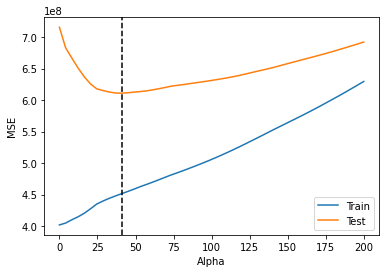

In [169]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(alphas, train_mse, label='Train')
ax.plot(alphas, test_mse, label='Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')

# np.argmin() returns the index of the minimum value in a list
optimal_alpha = alphas[np.argmin(test_mse)]

# Add a vertical line where the test MSE is minimized
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

print(f'Optimal Alpha Value: {int(optimal_alpha)}')

Take a look at this graph of our training and test MSE against alpha. Try to explain to yourself why the shapes of the training and test curves are this way. Make sure to think about what alpha represents and how it relates to overfitting vs underfitting.

## Summary

Well done! You now know how to build Lasso and Ridge regression models, use them for feature selection and find an optimal value for $\text{alpha}$. 